In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, [2, 3]]
y = iris.target
X , y

(array([[ 1.4,  0.2],
        [ 1.4,  0.2],
        [ 1.3,  0.2],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.7,  0.4],
        [ 1.4,  0.3],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.5,  0.1],
        [ 1.5,  0.2],
        [ 1.6,  0.2],
        [ 1.4,  0.1],
        [ 1.1,  0.1],
        [ 1.2,  0.2],
        [ 1.5,  0.4],
        [ 1.3,  0.4],
        [ 1.4,  0.3],
        [ 1.7,  0.3],
        [ 1.5,  0.3],
        [ 1.7,  0.2],
        [ 1.5,  0.4],
        [ 1. ,  0.2],
        [ 1.7,  0.5],
        [ 1.9,  0.2],
        [ 1.6,  0.2],
        [ 1.6,  0.4],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.6,  0.2],
        [ 1.6,  0.2],
        [ 1.5,  0.4],
        [ 1.5,  0.1],
        [ 1.4,  0.2],
        [ 1.5,  0.1],
        [ 1.2,  0.2],
        [ 1.3,  0.2],
        [ 1.5,  0.1],
        [ 1.3,  0.2],
        [ 1.5,  0.2],
        [ 1.3,  0.3],
        [ 1.3,  0.3],
        [ 1.3,  0.2],
        [ 1.6,  0.6],
        [ 1.9,  0.4],
        [ 

In [5]:
iris.target_names, np.unique(y)

(array(['setosa', 'versicolor', 'virginica'],
       dtype='<U10'), array([0, 1, 2]))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
# 上の2行を１行で書くと X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
y_pred = ppn.predict(X_test_std)
print('Misclassified sample: {:d}'.format((y_test != y_pred).sum()))

Misclassified sample: 4


In [12]:
(y_test!=y_pred).sum()

4

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))

Accuracy: 0.91


In [15]:
from plot_decision_regions_chap3 import plot_decision_regions

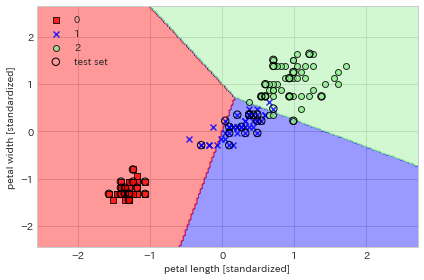

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

In [17]:
ppn.decision_function(np.array([0.01, 0]).reshape(1, -1))

array([[-0.10148747, -0.09775687, -0.49496489]])

In [18]:
ppn.coef_.dot(np.array([0.01, 0]).reshape(2, -1)) + ppn.intercept_.reshape(3, 1) # 確かにdecision_function()　はw.T x + b をしている

array([[-0.10148747],
       [-0.09775687],
       [-0.49496489]])

In [19]:
ppn.predict(np.array([0.01, 0]).reshape(1, -1))

array([1])

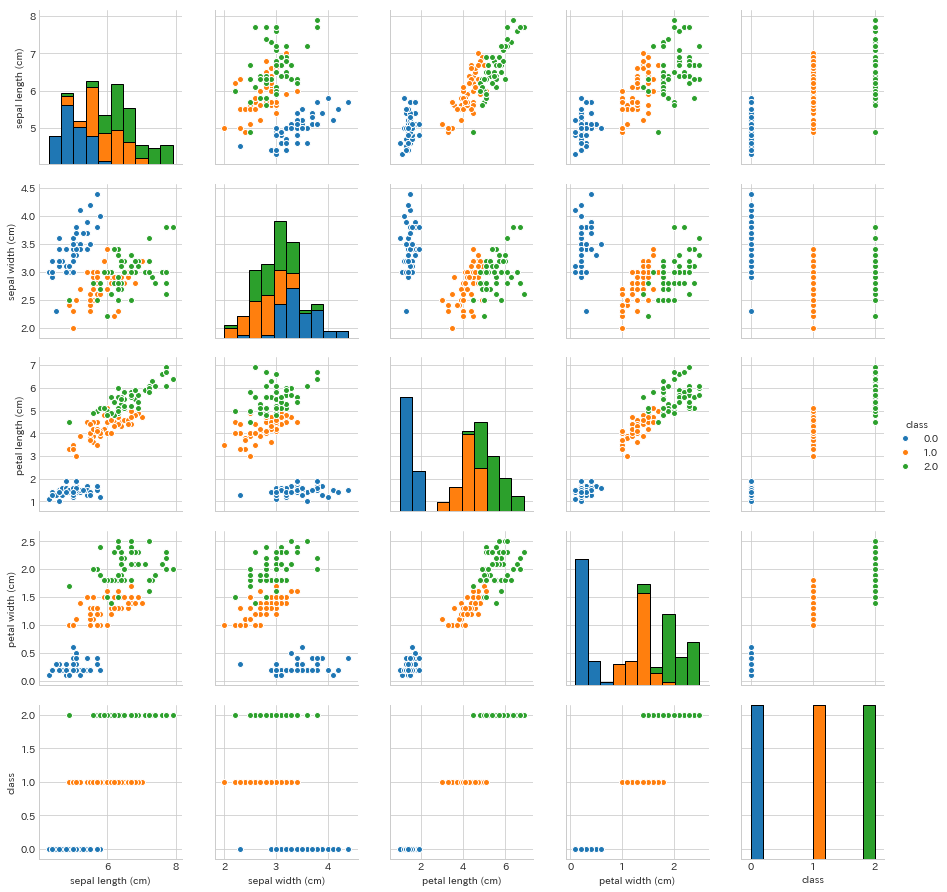

In [20]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(np.hstack((iris.data, iris.target.reshape(-1, 1))), columns=[list(iris.feature_names) + ['class']])
sns.pairplot(df, hue='class')

ロジステック関数

$$
\phi(z) = \frac{1}{1 + e^{-z}}
$$

をplotする

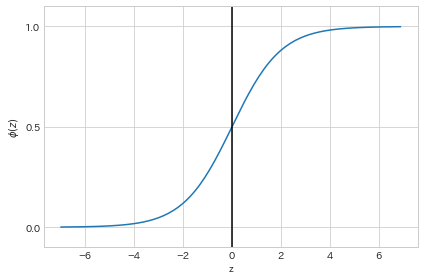

In [21]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # 現在編集中の図形のAxesインスタンスを取得する
# y軸のメモリに合わせて水平グリッドを追加
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

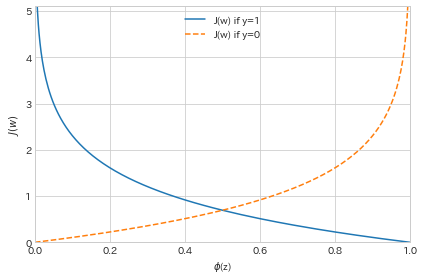

In [22]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel(r'$\phi$(z)')
plt.ylabel(r'$J(w)$')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()


L2正則化のコスト関数は以下の通り
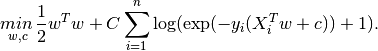

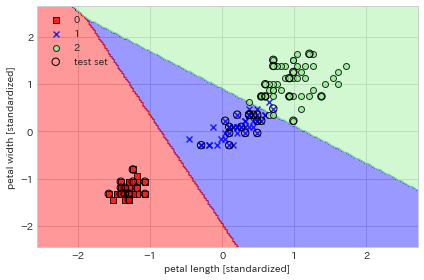

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()


In [24]:
lr.decision_function(np.array([0.1, -2]).reshape(1, -1)) # 決定境界との距離

array([[  3.24212242,   4.04414067, -20.79865929]])

In [25]:
lr.predict(np.array([0.1, -2]).reshape(1, -1))

array([1])

In [26]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1)), iris.target_names

(array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]]),
 array(['setosa', 'versicolor', 'virginica'],
       dtype='<U10'))

In [27]:
lr.coef_

array([[-7.34015187, -6.64685581],
       [ 2.54373335, -2.3421979 ],
       [ 9.46617627,  6.44380858]])

```python
lr.coef_
```
には
$$
\boldsymbol{W} = \left(\boldsymbol{w}_1, \boldsymbol{w}_2, \dots, \boldsymbol{w}_K\right)^T
$$
$K$はクラス数

が格納されている．

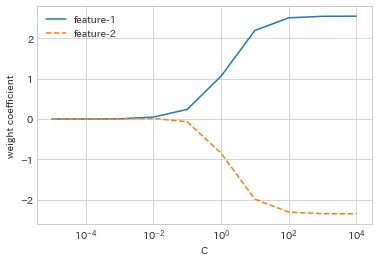

In [28]:
# 重み係数を格納するリストと，パラメータを格納するリストを作る
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) # 2クラスめのwベクトルを格納する
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='feature-1')
plt.plot(params, weights[:, 1], linestyle='--',
         label='feature-2')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

In [29]:
weights

array([[  6.55979672e-05,   3.27209902e-05],
       [  6.53690140e-04,   3.24948619e-04],
       [  6.31936684e-03,   3.03439293e-03],
       [  4.88199280e-02,   1.62092216e-02],
       [  2.38824476e-01,  -6.64831864e-02],
       [  1.06011115e+00,  -8.41544819e-01],
       [  2.19190886e+00,  -1.98265142e+00],
       [  2.50582212e+00,  -2.30336729e+00],
       [  2.54373335e+00,  -2.34219790e+00],
       [  2.54760621e+00,  -2.34616582e+00]])

以下SVM について

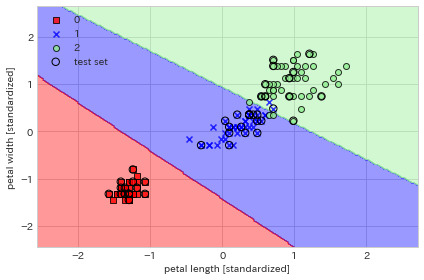

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()


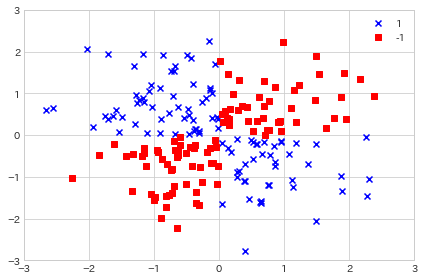

In [31]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
# ２つの引数に対して排他的論理和を実行
# 条件式: X_xor[:, 0], X_xor[:, 1] > 0より ２つともTrueまたはFalseならば False, それ以外はTrue
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# 排他的論理和がTrueの時は1, Falseの時は-1 を割り当てる．
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

[numpyを用いて排他的論理和形式の値を作る](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_xor.html)

In [32]:
a = np.random.randn(5, 2)
print(a)
np.logical_xor(a[:, 0]>0, a[:, 1]>0)

[[-0.59865394 -1.11589699]
 [ 0.76666318  0.35629282]
 [-1.76853845  0.35548179]
 [ 0.81451982  0.05892559]
 [-0.18505367 -0.80764849]]


array([False, False,  True, False, False], dtype=bool)

In [33]:
from matplotlib.colors import ListedColormap

def plotSVMBoundary(X, y, clf, mesh=True, boundary=True):
    
    # if SVM, draw margine lines
    linestyles = ['-']*2
    levels = [-1, 1]
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot range
    x_min = min(X[:,0])-1
    x_max = max(X[:,0])+1
    y_min = min(X[:,1])-1
    y_max = max(X[:,1])+1

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    Z = Z.reshape(XX.shape) # just reshape
    plt.contourf(XX, YY, Z, alpha=0.4, cmap=cmap)
    """
    if mesh:
        plt.pcolormesh(XX, YY, Z>0, cmap=cmap, alpha=0.4) # Z>0 のTrue, False で二つに分けてぬり分ける。
    """
    if boundary:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contour(XX, YY, Z, 
                    colors=['k', 'k'],
                    linestyles=linestyles,
                    levels=levels) # draw lines (level=0:boundary, level=+-1:margine lines)
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),  # cmap(..)出ないとアクセスできない
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)
    # if SVM, plot support vecters
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=55, facecolors='none', edgecolors='k', label='support vector') # facecolors='none' は点の内部を塗りつぶすさないと言うこと。
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

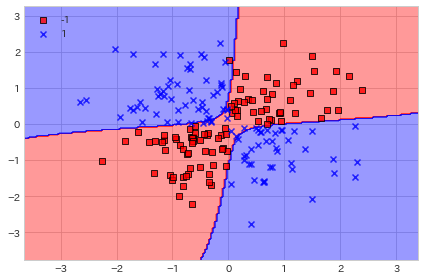

In [34]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_xor.png', dpi=300)
plt.show()


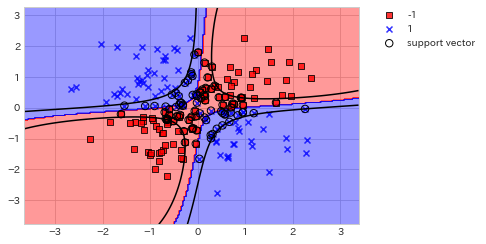

In [35]:
plotSVMBoundary(X=X_xor, y=y_xor, clf=svm)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

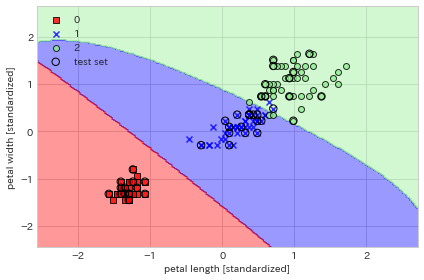

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()


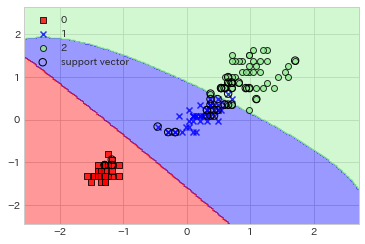

In [37]:
plotSVMBoundary(X_combined_std, y_combined, clf=svm, boundary=False)
plt.legend()

$\gamma$パラメータを小さくすると入力データ$\boldsymbol{x}$から遠い複数のサポートベクトルが識別に寄与するため識別境界は滑らかになる．

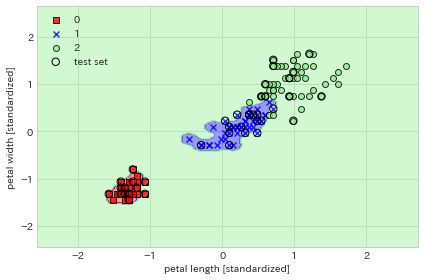

In [38]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_2.png', dpi=300)
plt.show()

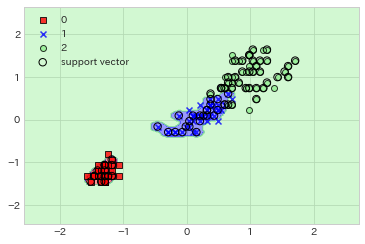

In [39]:
plotSVMBoundary(X_combined_std, y_combined, clf=svm, boundary=False)
plt.legend()

逆に$\gamma$パラメータを大きくすると入力データ$\boldsymbol{x}$に近いサポートベクトルのみが識別に寄与するため識別境界は複雑になる.

以下，決定木(decision tree)学習について

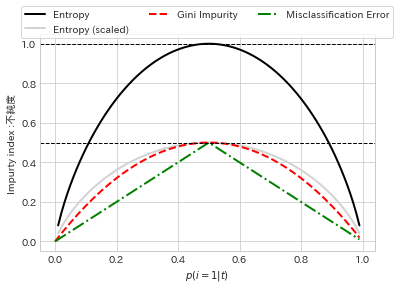

In [40]:
# 2値分類でのクラス１でのgini係数, エントロピー, 分類誤差 の変化をplotしてみる．
def gini(p):
    return (p)*(1-p) + (1 - p)*(1- (1- p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(p) for p in x]

fig, ax = plt.subplots(1, 1)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x),  err], ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                                     ['-', '-', '--', '-.'], ['k', 'lightgray', 'r', 'g', 'cyan']):
    ax.plot(x, i, label=lab, linestyle=ls, color=c, linewidth=2)

# fancybox: 枠の角を丸くするかどうか, shadow: 枠に影をつけるかどうか, frameon: 枠を描くかどうか
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False, frameon=True)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
ax.set_xlabel(r'$p(i=1|t)$')
ax.set_ylabel('Impurty index :不純度')

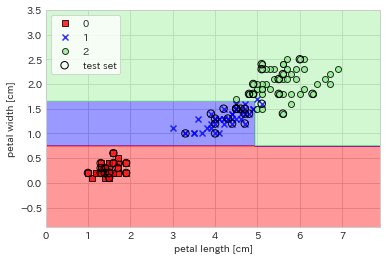

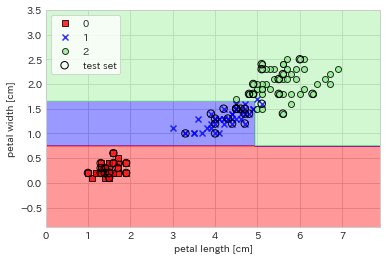

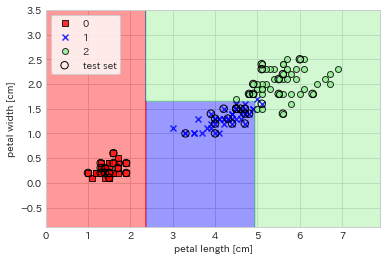

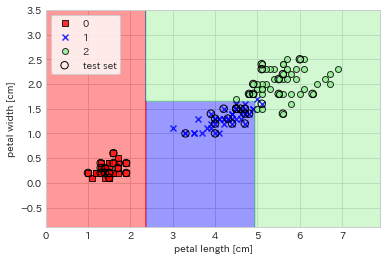

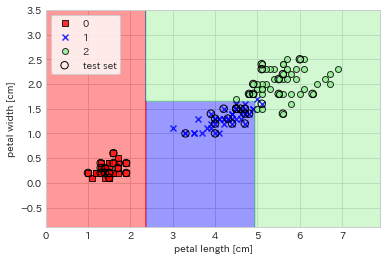

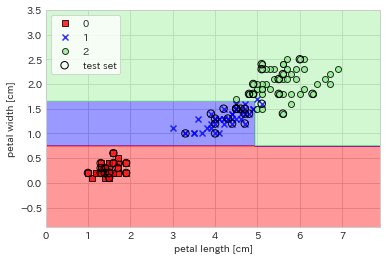

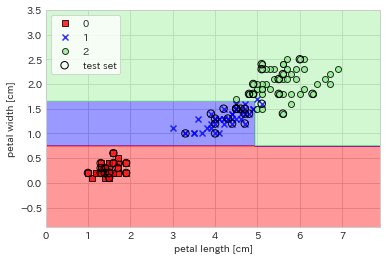

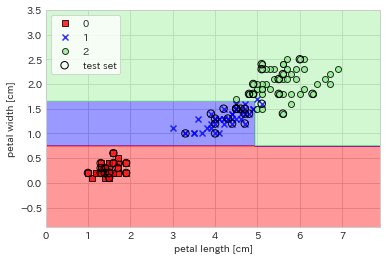

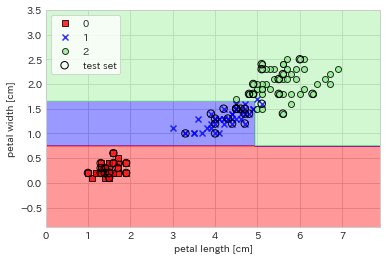

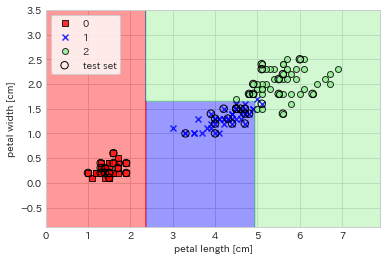

In [41]:
from sklearn.tree import DecisionTreeClassifier
for rs in range(10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=rs) # defaultではcriterion='gini'
    tree.fit(X_train, y_train)
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left', frameon=True)
    plt.show()

random_state乱数は最初にどの特徴軸について分割規則を求めるかの乱数と思われる.

In [42]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'],
                            class_names=iris.target_names, filled=True, rounded=True,  
                            special_characters=True) 
# filled=True: class別に色を塗る． 濃いほどその色のクラスに属する確率が高いということ.
# rounded=True: 丸みを帯させる．
# special_characters=True: 不等号が数学的な書き方になる

In [43]:
!dot -Tpng tree.dot -o tree.png

<img src="tree.png">

ランダムフォレストについて

building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


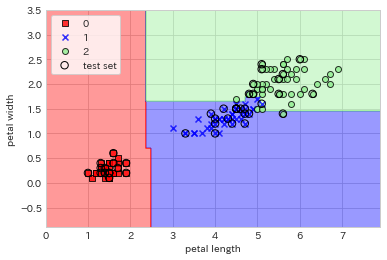

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=-1, verbose=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(frameon=True)

ここでのrandom_stateはここの決定木のブートストラップサンプル，特徴量のとり方などに関する乱数だと思われる

kNN法について

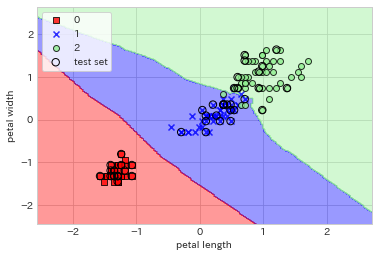

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(frameon=True)

引数
```python
metric='minkowski'
p=2
```
は，距離関数にミンコフスキー距離
$$
d(\boldsymbol{x}_i, \boldsymbol{x}_j) = \left( \sum_{d=1}^D \left| x_{i, d} - x_{j, d}\right |^p \right)^{\frac{1}{p}}
$$
において$p=2$として，ユークリッド距離を用いることを意味している